In [1]:
using MAT
using Plots
using MultivariateStats  # for PCA
#plotlyjs();
pyplot()

Plots.PyPlotBackend()

In [9]:
mouse_name = "ts10_V1"
date = "180422"
session_name = "ABABA_2"
roi = (-2, 24)
stepsize = 0.1

nbins = (roi[2] - roi[1]) / stepsize -1
# nbins = 2000

experiment_id = "$(mouse_name)_$(date)_$(session_name)"

_raw_data = joinpath("data/3GratingSequence/SpikeTrain/", experiment_id)
_chart_dir = joinpath("data/3GratingSequence/CHART/", experiment_id)

_temp = "data/3GratingSequence/temp"

ABABA_responses = matread(joinpath(_chart_dir, "linear_filter_ABABA.mat"))
ABABB_responses = matread(joinpath(_chart_dir, "linear_filter_ABABB.mat"))

Dict{String,Any} with 0 entries

In [8]:
nbins

260.0

In [7]:
ABABA_responses["WBC15a"]

53×259 Array{Float64,2}:
 27.8446       28.0162       27.504        …   5.05169       6.31942    
  0.0883359     0.0791845     0.097541        23.9232       26.7288     
  0.042696      0.0184505     0.00889735       0.483242      0.648145   
  1.10379       0.880746      0.668886         0.465488      0.615463   
  1.70586e-8    7.22077e-8    2.96219e-7       2.08043e-15   1.59964e-14
  1.86104e-26   1.16137e-27   6.80173e-29  …   4.12491       4.49948    
 16.3229       18.4685       20.2192           1.21204e-5    3.5399e-6  
  1.73377       1.46469       1.19525          4.51818       5.76862    
  0.933778      0.991231      0.987589        16.2184       16.7259     
  2.27326       2.31793       2.59379          2.8404        3.04583    
  7.19543       8.61609       9.91165      …   0.00101131    0.000359371
 16.5634       14.3651       12.0679           0.00279385    0.00472367 
  0.899701      0.93992       0.992613        22.0421       19.2947     
  ⋮                       

In [10]:
population_ABABA = zeros(nbins)
for (channel, response) in ABABA_responses
    population_ABABA = hcat(population_ABABA, mean(response, 1)')
end
population_ABABA = population_ABABA[:,2:end];

#population_ABABB = zeros(nbins)
#for (channel, response) in ABABB_responses
#    population_ABABB = hcat(population_ABABB, mean(response, 1)')
#end
#population_ABABB = population_ABABB[:,2:end];

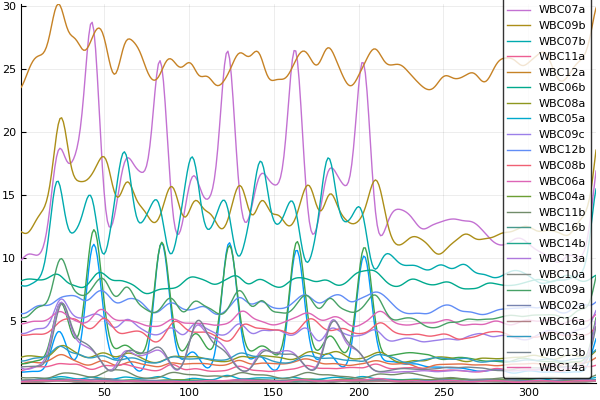

In [4]:
plot()
for (channel, response) in ABABA_responses
    plot!(mean(response, 1)', label=channel)
end
plot!()

In [159]:
plot()
for (channel, response) in ABABB_responses
    plot!(mean(response, 1)', label=channel)
end
plot!()

# Indirect Trajectory of Firing Rate

In [11]:
ABABA_marker = [
    (-2,0,"#78C2C4"),
    (0,1.5,:blue),
    (1.5,3,"#78C2C4"),
    (3,4.5,:blue),
    (4.5,6,"#78C2C4"),
    (6,7.5,:blue),
    (7.5,9,"#78C2C4"),
    (9,10.5,:blue),
    (10.5,12,"#78C2C4"),
    (12,13.5,:violet),
    (13.5,24,"#78C2C4")]

ABABB_marker = [
    (-2,0,"#F7C242"),
    (0,2,:blue),
    (2,4,"#F7C242"),
    (4,6,:blue),
    (6,8,"#F7C242"),
    (8,10,:blue),
    (10,12,"#F7C242"),
    (12,14,:blue),
    (14,16,"#F7C242"),
    (16,18,:red),
    (18,132,"#F7C242")]

traj2d_ABABAA = fit(PCA, population_ABABA, maxoutdim=2).proj
#traj2d_ABABAB = fit(PCA, population_ABABB, maxoutdim=2).proj;

In [59]:
?maximum

search: maximum maximum!



```
maximum(itr)
```

Returns the largest element in a collection.

```jldoctest
julia> maximum(-20.5:10)
9.5

julia> maximum([1,2,3])
3
```

```
maximum(A, dims)
```

Compute the maximum value of an array over the given dimensions. See also the [`max(a,b)`](@ref) function to take the maximum of two or more arguments, which can be applied elementwise to arrays via `max.(a,b)`.

```jldoctest
julia> A = [1 2; 3 4]
2×2 Array{Int64,2}:
 1  2
 3  4

julia> maximum(A, 1)
1×2 Array{Int64,2}:
 3  4

julia> maximum(A, 2)
2×1 Array{Int64,2}:
 2
 4
```


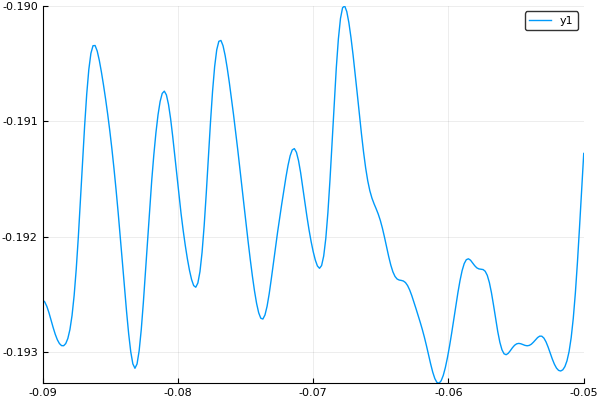

In [63]:
ys = mean(population_ABABA, 2)
plot(linspace(-0.09,-0.05,nbins), ys/maximum(ys)*0.01-0.2)

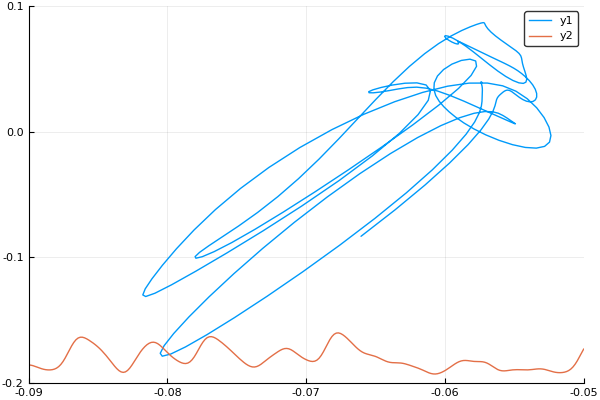

In [69]:
plot(traj2d_ABABAA[:,1], traj2d_ABABAA[:,2], xlims=(-0.09,-0.05), ylims=(-0.2,0.1))
plot!(linspace(-0.09,-0.05,nbins), ys/maximum(ys)*0.1-0.26)

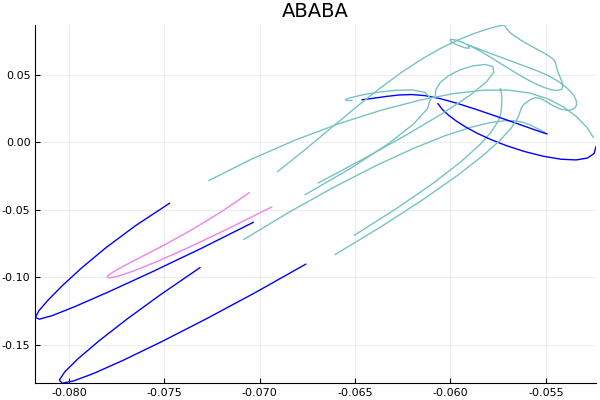

In [12]:
plot(legend=false)
for (m_start, m_end, m_color) in ABABA_marker
    h_start = ceil((m_start-roi[1])/(roi[2]-roi[1])*nbins+1) |> Int
    h_end = ceil((m_end-roi[1])/(roi[2]-roi[1])*nbins) |> Int
    
    plot!(traj2d_ABABAA[h_start:h_end,1], traj2d_ABABAA[h_start:h_end,2], color=m_color, title="ABABA")
end
plot!()

In [8]:
plot(legend=false)
for (m_start, m_end, m_color) in ABABB_marker
    h_start = ceil((m_start-roi[1])/(roi[2]-roi[1])*nbins+1) |> Int
    h_end = ceil((m_end-roi[1])/(roi[2]-roi[1])*nbins) |> Int
    
    plot!(traj2d_ABABAB[h_start:h_end,1], traj2d[h_start:h_end,2], color=m_color, title="ABABB")
end
plot!()

LoadError: [91mUndefVarError: traj2d not defined[39m

In [13]:
plot(title=experiment_id, legend=false)

current_idx = 100
for idx = 1:length(ABABB_marker)
    m_start, m_end, m_color = ABABB_marker[idx]
    h_start = ceil((m_start-roi[1])/(roi[2]-roi[1])*nbins+1) |> Int
    h_end = ceil((m_end-roi[1])/(roi[2]-roi[1])*nbins) |> Int
    if h_start > current_idx
        break
    elseif h_end >= current_idx
        h_end = current_idx
    end
    
    plot!(traj2d_ABABAA[h_start:h_end,1], traj2d_ABABAA[h_start:h_end,2], color=ABABA_marker[idx][3], label="ABABA")
    plot!(traj2d_ABABAB[h_start:h_end,1], traj2d_ABABAB[h_start:h_end,2], color=ABABB_marker[idx][3], label="ABABB")
end
plot!()
savefig(joinpath(_chart_dir, "trajectory_$(experiment_id).png"))

In [166]:
2000/17*9

1058.8235294117646

In [195]:
anim = @animate for current_idx = 1:10:nbins
    plot(title=experiment_id)
    for  idx = 1:length(ABABB_marker)
        m_start, m_end, m_color = ABABB_marker[idx]
        h_start = ceil((m_start-roi[1])/(roi[2]-roi[1])*nbins+1) |> Int
        h_end = ceil((m_end-roi[1])/(roi[2]-roi[1])*nbins) |> Int
        if h_start > current_idx
            break
        elseif h_end >= current_idx
            h_end = current_idx
        end

        plot!(traj2d_ABABAA[h_start:h_end,1], traj2d[h_start:h_end,2], color=ABABA_marker[idx][3],
              xlims=(-0.027,-0.016),ylims=(-0.035,0.035), legend=false)
        plot!(traj2d_ABABAB[h_start:h_end,1], traj2d[h_start:h_end,2], color=ABABB_marker[idx][3])
    end
    plot!()
    end
gif(anim, joinpath(_temp,"demo.gif"), fps = 24)

INFO: Saved animation to /Users/zane/Documents/MyDocuments/Plans/2-private/eagle/Foundation/Project Sesame/Sesame/Analysis/data/3GratingSequence/temp/demo.gif


Plots.AnimatedGif("/Users/zane/Documents/MyDocuments/Plans/2-private/eagle/Foundation/Project Sesame/Sesame/Analysis/data/3GratingSequence/temp/demo.gif")

In [71]:
xs = linspace(-0.09,-0.05,nbins)
ys = ys/maximum(ys)*0.1-0.26
anim = @animate for current_idx = 1:nbins
    print("\r")
    print(floor(current_idx/nbins*100))
    plot(traj2d_ABABAA[1:Int(current_idx),1], traj2d_ABABAA[1:Int(current_idx), 2],
         title=experiment_id, xlims=(-0.09,-0.05), ylims=(-0.2,0.1), legend=false)
    plot!(xs[1:Int(current_idx)], ys[1:Int(current_idx)])
    end
gif(anim, joinpath(_temp,"demo.gif"), fps = 18)

100.0

INFO: Saved animation to /Users/zane/Documents/MyDocuments/Plans/2-private/eagle/Foundation/Project Sesame/Sesame/Analysis/data/3GratingSequence/temp/demo.gif


Plots.AnimatedGif("/Users/zane/Documents/MyDocuments/Plans/2-private/eagle/Foundation/Project Sesame/Sesame/Analysis/data/3GratingSequence/temp/demo.gif")

In [39]:
traj2d_ABABAA[1:1,1]

1-element Array{Float64,1}:
 -0.0573281

In [ ]:
for i=1:10
    print(str(i))
    print("\r")
end

# Direct

In [161]:
plot()
x_B = mean(ABABB_responses["WBC02a"],1)'
y_B = mean(ABABB_responses["WBC02b"],1)'
x_A = mean(ABABA_responses["WBC02a"],1)'
y_A = mean(ABABA_responses["WBC02b"],1)'
plot()
plot!(x_B, y_B)
plot!(x_A, y_A)
plot!()